# Configuração

In [ ]:
!pip uninstall numpy
!pip install numpy

!pip install pmdarima

Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.3MB 187kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have 

     |████████████████████████████████| 1.5MB 25.2MB/s 
     |████████████████████████████████| 9.5MB 38.8MB/s 
     |████████████████████████████████| 14.8MB 157kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Import modules
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from random import shuffle, choice
import datetime

import matplotlib
import statsmodels.api as sma
import statsmodels.graphics as smg
import statsmodels.tsa as smt
import statsmodels.tools as smtools

from pmdarima.arima import auto_arima

In [ ]:
!git clone https://github.com/eitiyamamoto/MO826-projeto.git
%cd MO826-projeto
!ls
!git pull origin master

Cloning into 'MO826-projeto'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 160 (delta 49), reused 119 (delta 20), pack-reused 0
Receiving objects: 100% (160/160), 56.24 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Checking out files: 100% (78/78), done.
/content/MO826-projeto
CONTRIBUTING.rst  image        mo826_projeto  reports		    tests
data		  LICENSE      notebooks      requirements_dev.txt  tox.ini
docs		  Makefile     README.md      setup.cfg
HISTORY.rst	  MANIFEST.in  README.rst     setup.py
From https://github.com/eitiyamamoto/MO826-projeto
 * branch            master     -> FETCH_HEAD
Already up to date.


In [ ]:
isolamento_sao_paulo_data = pd.read_csv('data/raw/20210420_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

In [ ]:
isolamento_sao_paulo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271966 entries, 0 to 271965
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     271966 non-null  object 
 1   codigo_ibge    271966 non-null  int64  
 2   dia            271966 non-null  int64  
 3   mes            271966 non-null  int64  
 4   datahora       271966 non-null  object 
 5   casos          271966 non-null  int64  
 6   casos_novos    271966 non-null  int64  
 7   casos_pc       271966 non-null  object 
 8   casos_mm7d     271966 non-null  object 
 9   obitos         271966 non-null  int64  
 10  obitos_novos   271966 non-null  int64  
 11  obitos_pc      271966 non-null  object 
 12  obitos_mm7d    271966 non-null  object 
 13  letalidade     271966 non-null  object 
 14  nome_ra        271545 non-null  object 
 15  cod_ra         271966 non-null  int64  
 16  nome_drs       271545 non-null  object 
 17  cod_drs        271966 non-nul

In [ ]:
isolamento_sao_paulo_data.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,682","-51,0737",9
1,Adolfo,3500204,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
5,Águas de Santa Bárbara,3500550,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Sorocaba,13,Bauru,12,5931,1106,40446,0,8.0,"-22,8812","-49,2421",9
6,Águas de São Pedro,3500600,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
7,Agudos,3500709,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Bauru,3,Bauru,12,36134,5524,96671,0,8.0,"-22,4694","-48,9863",9
8,Alambari,3500758,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Sorocaba,13,Sorocaba,6,5779,830,1596,0,8.0,"-23,5503","-47,898",9
9,Alfredo Marcondes,3500808,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Presidente Prudente,9,Presidente Prudente,2,3927,907,11892,0,8.0,"-21,9527","-51,414",9


In [ ]:
booleans = isolamento_sao_paulo_data['codigo_ibge'] == 3509502
filter_campinas = pd.Series(booleans)
campinas_isolamento = isolamento_sao_paulo_data[filter_campinas]
campinas_isolamento.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
753,Campinas,3509502,26,2,26/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
1398,Campinas,3509502,27,2,27/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2043,Campinas,3509502,28,2,28/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2688,Campinas,3509502,29,2,29/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
3333,Campinas,3509502,1,3,01/03/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",10
3978,Campinas,3509502,2,3,02/03/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",10
4623,Campinas,3509502,3,3,03/03/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",10
5268,Campinas,3509502,4,3,04/03/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",10
5913,Campinas,3509502,5,3,05/03/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",10


In [ ]:
cols_time_series = ['datahora', 'obitos']
campinas_isolamento_obito = campinas_isolamento[cols_time_series]

In [ ]:
campinas_isolamento_obito['datahora'] = pd.to_datetime(campinas_isolamento_obito.loc[:, 'datahora'], format="%d/%m/%Y")
campinas_isolamento_obito['datahora'] = campinas_isolamento_obito.loc[:,'datahora'].astype('datetime64[ns]')
campinas_isolamento_obito = campinas_isolamento_obito.set_index("datahora")
campinas_isolamento_obito = campinas_isolamento_obito.sort_index().asfreq(freq='D', method='pad')
campinas_isolamento_obito.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='datahora', length=421, freq='D')

# Óbitos totais

## Holt Winter

In [ ]:
campinas_isolamento_obito

,obitos
datahora,
2020-02-25,0
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
...,...
2021-04-16,2783
2021-04-17,2818
2021-04-18,2823


In [ ]:
case_train = campinas_isolamento_obito[:295]
case_test = campinas_isolamento_obito[295:]

In [ ]:
holt_winter_model = smt.holtwinters.ExponentialSmoothing(case_train, trend="add", seasonal="add")

result_confirmed = holt_winter_model.fit()

print(result_confirmed.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   obitos   No. Observations:                  295
Model:             ExponentialSmoothing   SSE                           4213.206
Optimized:                         True   AIC                            806.406
Trend:                         Additive   BIC                            846.963
Seasonal:                      Additive   AICC                           807.702
Seasonal Periods:                     7   Date:                 Sat, 19 Jun 2021
Box-Cox:                          False   Time:                         12:15:28
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4318925                alpha                 True
smoothing_trend          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


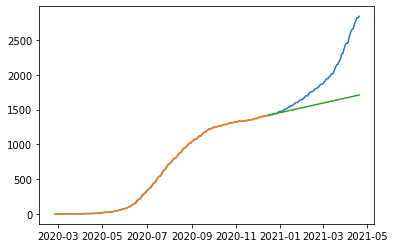

In [ ]:
pred_train = result_confirmed.predict(start=case_train.index[0], end=case_train.index[-1])
pred_test = result_confirmed.predict(start=case_test.index[0], end=case_test.index[-1])
plt.plot(campinas_isolamento_obito.index, campinas_isolamento_obito, label="Real cases")
plt.plot(pred_train.index, pred_train, label='Holt Winters Train')
plt.plot(pred_test.index, pred_test, label='Holt Winters Test')
plt.plot(figsize=(64,32))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(case_test, pred_test)
mse

212943.17228752957

## Autor ARIMA

In [ ]:
model_auto = auto_arima(case_train['obitos'].values,start_p=0, start_q=0, 
                            max_p=6, max_q=6, d=1,seasonal=True, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1892.873, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1829.147, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1806.307, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1793.972, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1787.711, Time=0.32 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1787.270, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1791.778, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1720.006, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1719.994, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1707.117, Time=0.60 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1677.989, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1780.162, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1720.433, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=1718.807, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1720.215, Time=0.70 sec
 ARIMA(3,1

In [ ]:
model_auto.fit(case_train['obitos'].values)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
predict = model_auto.predict(n_periods= int(case_test.size))

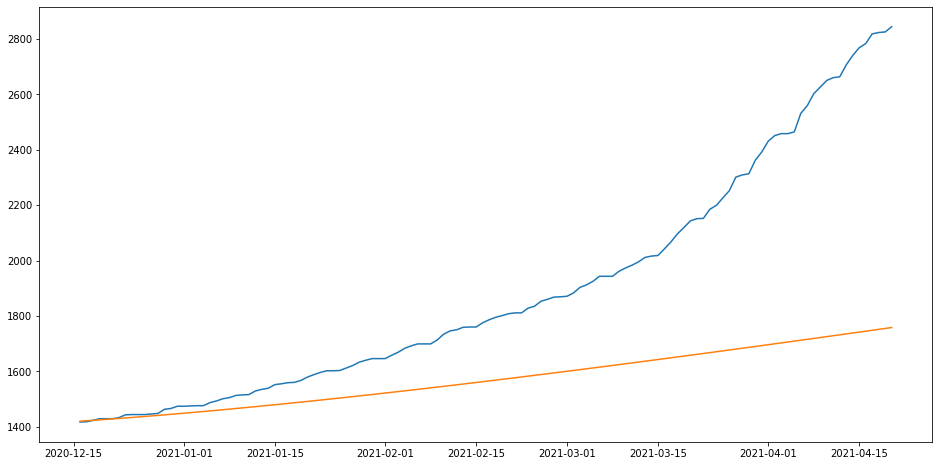

In [ ]:
plt.plot(case_test.index, case_test)
plt.plot(case_test.index, predict)
plt.gcf().set_size_inches((16,8))

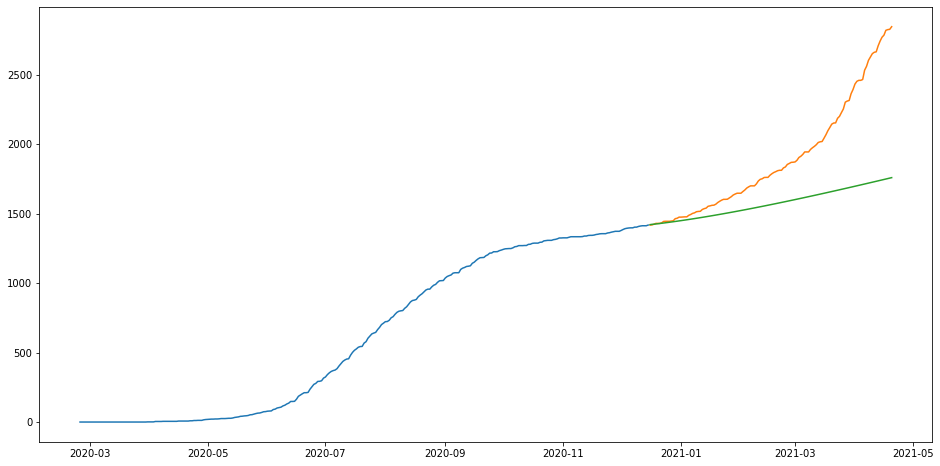

In [ ]:
plt.plot(case_train.index, case_train)
plt.plot(case_test.index, case_test)
plt.plot(case_test.index, predict)
plt.gcf().set_size_inches((16,8))

In [ ]:
mse = mean_squared_error(predict, case_test)
mse

197627.5565617479

## process data

In [ ]:
campinas_isolamento.head(5)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,25/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
753,Campinas,3509502,26,2,26/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
1398,Campinas,3509502,27,2,27/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2043,Campinas,3509502,28,2,28/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2688,Campinas,3509502,29,2,29/02/2020,0,0,"0,00E+00",0,0,0,"0,00E+00",0,0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9


In [ ]:
campinas_isolamento['datahora'] = pd.to_datetime(campinas_isolamento.loc[:, 'datahora'], format="%d/%m/%Y")
campinas_isolamento['datahora'] = campinas_isolamento.loc[:,'datahora'].astype('datetime64[ns]')
campinas_isolamento = campinas_isolamento.set_index("datahora")
campinas_isolamento = campinas_isolamento.sort_index().asfreq(freq='D', method='pad')
campinas_isolamento.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='datahora', length=421, freq='D')

In [ ]:
campinas_isolamento_lagged = campinas_isolamento_obito[:]
for i in range(1,7):
  campinas_obito_lagged = campinas_isolamento_obito.shift(i);
  campinas_obito_lagged = campinas_obito_lagged.rename(columns={'obitos': 'date_' + str(i)})
  campinas_isolamento_lagged = pd.merge(campinas_isolamento_lagged, campinas_obito_lagged, how='inner', left_on=['datahora'], right_on=['datahora'])

In [ ]:
campinas_isolamento_lagged[50:].head(10)

,obitos,date_1,date_2,date_3,date_4,date_5,date_6
datahora,,,,,,,
2020-04-15,5,5.0,5.0,5.0,5.0,5.0,5.0
2020-04-16,7,5.0,5.0,5.0,5.0,5.0,5.0
2020-04-17,7,7.0,5.0,5.0,5.0,5.0,5.0
2020-04-18,7,7.0,7.0,5.0,5.0,5.0,5.0
2020-04-19,7,7.0,7.0,7.0,5.0,5.0,5.0
2020-04-20,7,7.0,7.0,7.0,7.0,5.0,5.0
2020-04-21,7,7.0,7.0,7.0,7.0,7.0,5.0
2020-04-22,9,7.0,7.0,7.0,7.0,7.0,7.0
2020-04-23,9,9.0,7.0,7.0,7.0,7.0,7.0


In [ ]:
obitos = campinas_isolamento_lagged.pop('obitos')

In [ ]:
obitos

datahora
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       0
2020-02-29       0
              ... 
2021-04-16    2783
2021-04-17    2818
2021-04-18    2823
2021-04-19    2825
2021-04-20    2844
Name: obitos, Length: 421, dtype: int64

In [ ]:
campinas_isolamento_lagged

,date_1,date_2,date_3,date_4,date_5,date_6
datahora,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN
2020-02-28,0.0,0.0,0.0,NaN,NaN,NaN
2020-02-29,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
2021-04-16,2768.0,2740.0,2706.0,2663.0,2660.0,2650.0
2021-04-17,2783.0,2768.0,2740.0,2706.0,2663.0,2660.0
2021-04-18,2818.0,2783.0,2768.0,2740.0,2706.0,2663.0


In [ ]:
campinas_isolamento_lagged = campinas_isolamento_lagged.fillna(0)

In [ ]:
campinas_isolamento_lagged

,date_1,date_2,date_3,date_4,date_5,date_6
datahora,,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-04-16,2768.0,2740.0,2706.0,2663.0,2660.0,2650.0
2021-04-17,2783.0,2768.0,2740.0,2706.0,2663.0,2660.0
2021-04-18,2818.0,2783.0,2768.0,2740.0,2706.0,2663.0


## SVR

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(),
                    svm.SVR(max_iter=5000, kernel='linear'))
clf.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=5000,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
r = clf.score(case_test, label_test)

In [ ]:
r

0.9891754871164236

In [ ]:
campinas_train_predict = clf.predict(case_train)

In [ ]:
campinas_test_predict = clf.predict(case_test)

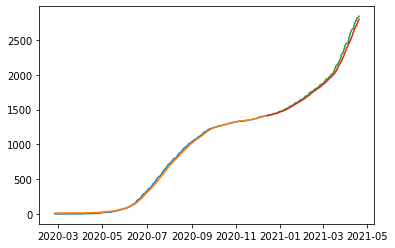

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

1806.9540693486422

## SGD

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

0.9941595754757001

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

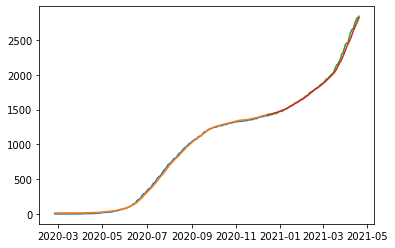

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

974.9518499737036

## Ada boost


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
reg = make_pipeline(StandardScaler(),
                    AdaBoostRegressor(random_state=0, n_estimators=200))
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostregressor',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                   loss='linear', n_estimators=200,
                                   random_state=0))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

-1.7132829789921045

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

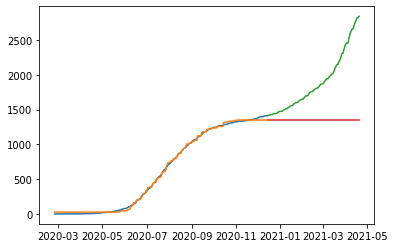

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

452932.8730924206

## NN

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg = make_pipeline(StandardScaler(),
                    MLPRegressor(random_state=1, max_iter=8000, hidden_layer_sizes=(100,)))
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=8000, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

0.973269482593943

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

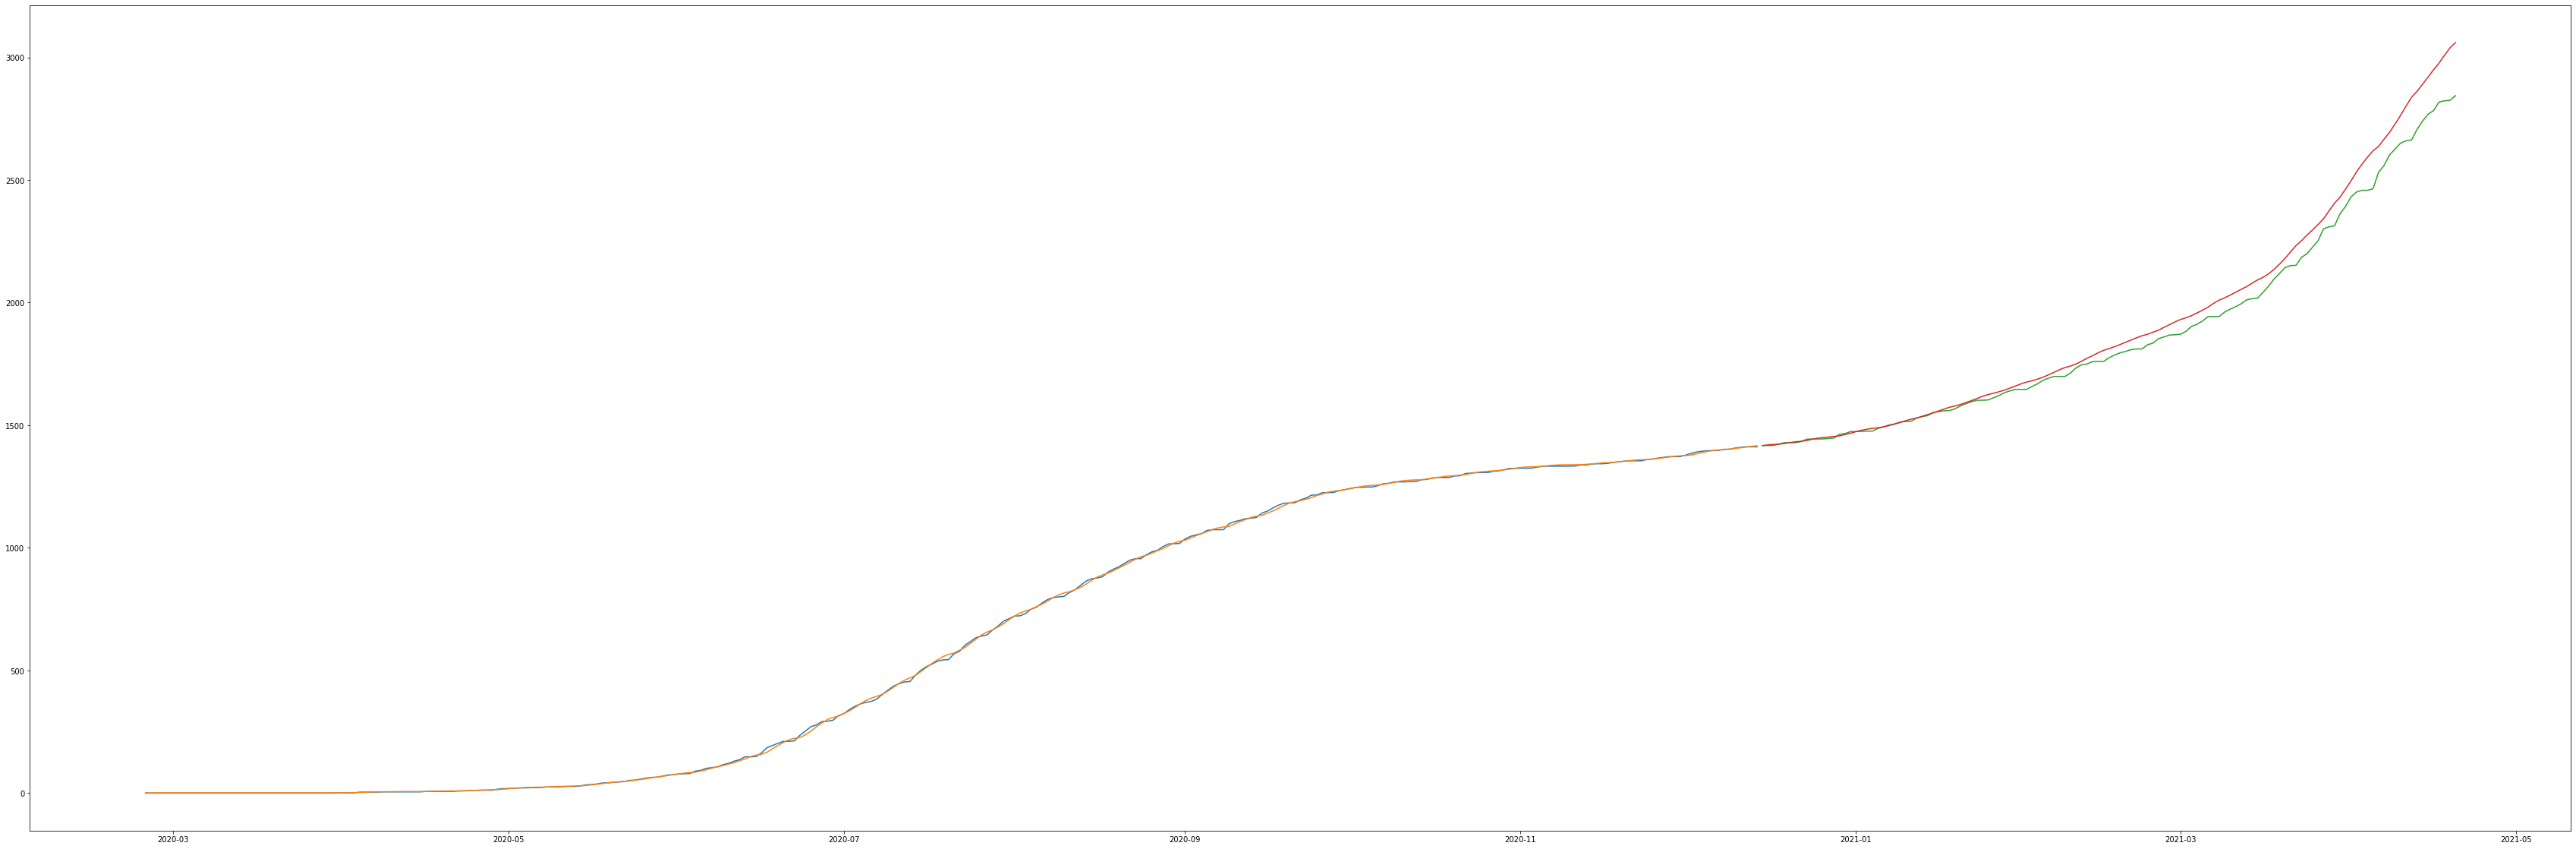

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.rcParams["figure.figsize"] = (60,20)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

4462.170050714618